In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv("Movie_regression.csv", header = 0)

In [3]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


# Missing Value Treatment

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [5]:
mean = df["Time_taken"].mean()

In [6]:
mean

157.3914979757085

In [7]:
 df["Time_taken"].fillna(value = df["Time_taken"].mean(),inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [9]:
df.describe()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.391498,260.832095,39.181818,545.043478,45057.707510
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,30.921101,104.779133,12.513697,106.332889,18364.351764
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,10000.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.690000,223.796000,28.000000,465.000000,34050.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,158.980000,254.400000,39.000000,535.500000,42400.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.520000,283.416000,50.000000,614.750000,50000.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,100000.000000


# Dummy Variable Creation

In [10]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [11]:
df = pd.get_dummies(df, columns=["3D_available", "Genre"],drop_first=True)

In [12]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


# Spliting of X (Independent) and Y (Dependent) Values

In [13]:
x = df.loc[:,df.columns!="Collection"]

In [14]:
x.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [15]:
y = df["Collection"]

In [16]:
y.head()

0    48000
1    43200
2    69400
3    66800
4    72400
Name: Collection, dtype: int64

# Training Data 

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_x, test_x, train_y, test_y = train_test_split(x, y,test_size = 0.2, random_state = 0)

In [19]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape 

((404, 19), (404,), (102, 19), (102,))

# Decision Tree of Regression 

In [20]:
from sklearn import tree
regTree = tree.DecisionTreeRegressor(max_depth=3)

In [21]:
regTree

DecisionTreeRegressor(max_depth=3)

In [22]:
regTree.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=3)

In [23]:
y_pred_train = regTree.predict(train_x)
y_pred_test = regTree.predict(test_x)

In [24]:
y_pred_train

array([ 65183.33333333,  46187.35632184,  65183.33333333,  46187.35632184,
        23514.28571429,  35137.77777778,  46187.35632184,  46187.35632184,
        65183.33333333,  23514.28571429,  35137.77777778,  35137.77777778,
        35137.77777778,  35137.77777778,  23514.28571429,  46187.35632184,
        23514.28571429,  91860.86956522,  46187.35632184,  23514.28571429,
        35137.77777778,  46187.35632184,  46187.35632184,  35137.77777778,
        65183.33333333,  35137.77777778,  46187.35632184,  65183.33333333,
        23514.28571429,  23514.28571429,  35137.77777778,  35137.77777778,
        23514.28571429,  65183.33333333,  46187.35632184,  35137.77777778,
        46187.35632184,  23514.28571429,  23514.28571429,  46187.35632184,
        65183.33333333,  46187.35632184,  46187.35632184,  35137.77777778,
        65183.33333333,  65183.33333333,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  35137.77777778,  46187.35632184,
        35137.77777778,  

In [25]:
y_pred_test 

array([ 46187.35632184, 100000.        ,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  23514.28571429,  23514.28571429,
        23514.28571429,  23514.28571429,  91860.86956522,  65183.33333333,
        46187.35632184,  65183.33333333,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184, 100000.        ,  46187.35632184,  35137.77777778,
        91860.86956522,  35137.77777778,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  35137.77777778,
        23514.28571429, 100000.        ,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  35137.77777778,  35137.77777778,
        35137.77777778,  46187.35632184,  35137.77777778,  35137.77777778,
        46187.35632184,  

# Model Performance

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
mean_squared_error(test_y, y_pred_test)

99983788.27972667

In [28]:
r2_score(test_y, y_pred_test)

0.6894186462226066

In [29]:
r2_score(train_y, y_pred_train)

0.8364651040556869

# Plotting Decision Tree

In [30]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\atulmaniraj15\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


[Text(167.4, 190.26, 'X[3] <= 37982.312\nmse = 340211131.017\nsamples = 404\nvalue = 45178.713'),
 Text(83.7, 135.9, 'X[10] <= 440172.5\nmse = 150397028.852\nsamples = 329\nvalue = 39150.152'),
 Text(41.85, 81.53999999999999, 'X[0] <= 135.638\nmse = 77238706.48\nsamples = 153\nvalue = 30351.634'),
 Text(20.925, 27.180000000000007, 'mse = 46827239.506\nsamples = 90\nvalue = 35137.778'),
 Text(62.775000000000006, 27.180000000000007, 'mse = 41209795.918\nsamples = 63\nvalue = 23514.286'),
 Text(125.55000000000001, 81.53999999999999, 'X[5] <= 9.205\nmse = 88194771.436\nsamples = 176\nvalue = 46798.864'),
 Text(104.625, 27.180000000000007, 'mse = 56301679.218\nsamples = 174\nvalue = 46187.356'),
 Text(146.475, 27.180000000000007, 'mse = 0.0\nsamples = 2\nvalue = 100000.0'),
 Text(251.10000000000002, 135.9, 'X[3] <= 41312.535\nmse = 314082090.667\nsamples = 75\nvalue = 71624.0'),
 Text(209.25, 81.53999999999999, 'X[0] <= 167.869\nmse = 153862452.903\nsamples = 51\nvalue = 63043.137'),
 Text(

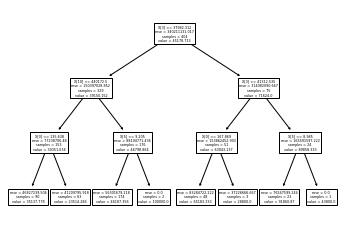

In [31]:
tree.plot_tree(regTree)